# **Notebook 1: Time series forecasting using ARIMA**

In this notebook, we will explore a fundamental time series forecasting technique known as **ARIMA** (Autoregressive Integrated Moving Average). ARIMA is a widely adopted statistical method for modeling and predicting time series data. Additionally, this notebook will review key statistical modeling techniques commonly applied in time series analysis.

The following resources and references were used in the preparation of this notebook:

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

### Notes and Codes are Organized and further Revised and Updated by Christopher Monterola.



# 1. General Introduction

Most of us would have heard about Cryptocurrency. Many of us would have invested in their coins too. But, is investing money in such a volatile currency safe? How can we make sure that investing in these coins now would surely generate a healthy profit in the future? We can’t be sure but we can surely generate an approximate value based on the previous prices. Time series models is one way to predict them.  

Besides Crypto Currencies, there are multiple important areas where time series forecasting is used for example : forecasting Sales, Call Volume in a Call Center, Solar activity, Ocean tides, Stock market behaviour, and many others.  

Assume the Manager of a hotel wants to predict how many visitors should he expect next year to accordingly adjust the hotel’s inventories and make a reasonable guess of the hotel’s revenue. Based on the data of the previous years/months/days, (S)he can use time series forecasting and get an approximate value of the visitors. Forecasted value of visitors will help the hotel to manage the resources and plan things accordingly.  

ARIMA captures a suite of different standard temporal structures in time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

**AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.  
**I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.  
**MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.  



Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.  

Predicted value of $X_{t}$ = a constant and/or a weighted sum of one or more recent values of $X_{t}$ and/or a weighted sum of one or more recent values of the errors. To illustrate, consider the examples below (see https://people.duke.edu/~rnau/411arim.htm):


**Case 1:** For example, ARIMA(1,0,0) = AR(1) is a first-order autoregressive model: if the series is stationary and autocorrelated, perhaps it can be predicted as a multiple of its own previous value, plus a constant.  The forecasting equation in this case is


\begin{equation}
X_{t}  =  \mu  + \alpha _{1}X_{t-1}
\end{equation}

while ARIMA(2,0,0)

\begin{equation}
X_{t}  =  \mu  + \alpha _{1}X_{t-1} +  \alpha _{2}X_{t-2}
\end{equation}

or in general ARIMA(p,0,0)

\begin{equation}
X_{t}  =  \mu  + \alpha _{1}X_{t-1} +  \alpha _{2}X_{t-2} \dots + \alpha _{p}X_{t-p}
\end{equation}

**Case 2:** ARIMA(0,d,0) on the otherhand means:

            If d=0:  
\begin{equation}    
X_{t}  =  X_{t}
\end{equation}   

            If d=1:  
\begin{equation}    
X_{t}  =   X_{t-1} + \epsilon _{t}
\end{equation}  

            If d=2:  
\begin{equation}    
X_{t} =   2 X_{t-1} - X_{t-2} + \epsilon _{t} + \epsilon _{t-1}
\end{equation}

**Case 3:** ARIMA(0,0,q) on the otherhand means:

\begin{equation}
X_{t} = \varepsilon _{t}+\theta_{1}\varepsilon _{t-1}+\cdots +\theta _{q}\varepsilon _{t-q}
\end{equation}

where $\theta_{q}$ is the coefficient at time $t-q$ of the residual $\varepsilon _{t-q}$.

for the general case of ARIMA(p,d,q)

\begin{equation}
X_{t} = \alpha _{1}X_{t-1} + \dots + \alpha _{p}X_{t-p} + \varepsilon _{t}+\theta_{1}\varepsilon _{t-1}+\cdots +\theta _{q}\varepsilon _{t-q}
\end{equation}


### Derivation and meaning of (p, d, q)

Again, restating the problem above, given a time series of data $X_t$ where $t$ is an integer index and the $X_t$ are real numbers, an ARIMA(p', q) model is given by:


\begin{equation}
X_{t}-\alpha _{1}X_{t-1}-\dots -\alpha _{p'}X_{t-p'}=\varepsilon _{t}+\theta_{1}\varepsilon _{t-1}+\cdots +\theta _{q}\varepsilon _{t-q}
\end{equation}

or equivalently by

\begin{equation}
\left(1-\sum _{i=1}^{p'}\alpha _{i}L^{i}\right)X_{t}=
\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}
\end{equation}


where $L$ is the lag operator given by $X_{t-p'}=L^{p'} X^t$ and $\varepsilon_{t-q}=L^{q} \varepsilon_{t}$ , the $\alpha_{i}$  are the parameters of the autoregressive part of the model, the $\theta _{i}$ are the parameters of the moving average part and the $\varepsilon_{t}$ are error terms. The error terms $\varepsilon _{t}$  are generally assumed to be independent, identically distributed variables sampled from a normal distribution with zero mean.

The above can be generalized into (see https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average for derivation).  

\begin{equation}
\left(1-\sum _{i=1}^{p}\phi _{i}L^{i}\right)(1-L)^{d}X_{t}=\delta +\left(1+\sum _{i=1}^{q}\theta _{i}L^{i}\right)\varepsilon _{t}
\end{equation}

This defines an ARIMA(p,d,q) process with drift $\mu$:

\begin{equation}
\mu = \frac {\delta }{1-\sum \phi _{i}}
\end{equation}

The parameters of the ARIMA model are then defined as follows:  

p: The number of lag observations included in the model, also called the lag order (deals with **window** of $X_t$)  
d: The number of times that the raw observations are differenced, also called the degree of differencing (*deals with order of **differencing** of $X_t$*)  
q: The size of the moving average window, also called the order of moving average (deals with **residuals** )  

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.  

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.  


Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.  

Next, let’s take a look at how we can use the ARIMA model in Python. We will start with loading a simple univariate time series.  

# 2. Data Set and important statistics

### The monthly sales of champagne from January 1964 to September 1972

The problem is to predict the number of monthly sales of champagne for the Perrin Freres label (named for a region in France). The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data. The values are a count of millions of sales and there are 105 observations.  

The dataset is credited to Makridakis and Wheelwright, 1989.  You can learn more about this dataset and download it directly from DataMarket.  Download the dataset as a CSV file and place it in your current working directory with the filename “champagne.csv“.  

In [8]:
### Just to remove warnings to prettify the notebook.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


We will pretend that it is September 1971 and withhold the last one year of data from analysis and model selection. This final year of data will be used to validate the final model. The code below will load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv). The specific contents of these files are:

--- dataset.csv: Observations from January 1964 to September 1971 (93 observations)  
--- validation.csv: Observations from October 1971 to September 1972 (12 observations)  
--- The validation dataset is about 11% of the original dataset.  

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
# data_dir = '/content/drive/MyDrive/Teaching/ML2_MSDS2026FT/Notebook1_ARIMA/'

In [10]:
df = pd.read_csv('dataset/champagne.csv')

In [11]:
# separate out a validation dataset
from pandas import read_csv

# Load the series without 'squeeze' parameter
series = read_csv('dataset/champagne.csv', header=0, index_col=0, parse_dates=True)

# Split the data into training (dataset) and validation sets
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]

# Display dataset and validation sizes
print(f'Dataset {len(dataset)}, Validation {len(validation)}')

# Save the datasets to CSV
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)


Dataset 93, Validation 12


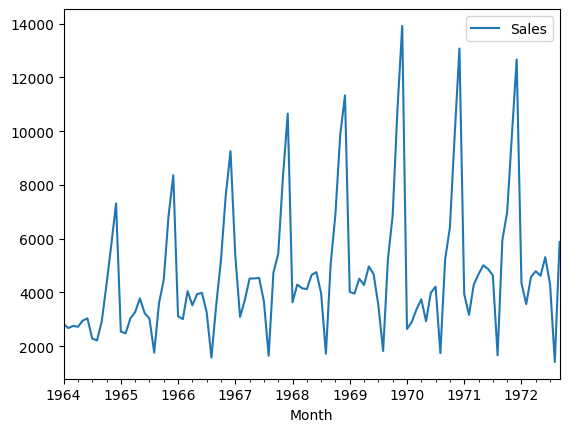

In [12]:
from matplotlib import pyplot
%matplotlib inline
series.plot()
pyplot.show()

### 2.1 Model Evaluation

Model evaluation will only be performed on the data in dataset.csv. The observations are a count of champagne sales in millions of units. We will evaluate the performance of predictions using the root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data.  

Any transforms to the data must be reversed before the RMSE is calculated and reported to make the performance between different methods directly comparable.
  
We can calculate the RMSE using the helper function from the scikit-learn library mean_squared_error() that calculates the mean squared error between a list of expected values (the test set) and the list of predictions. We can then take the square root of this value to give us an RMSE score.  

### 2.2 Walk-forward validation

Candidate models will be evaluated using walk-forward validation. This is because a rolling-forecast type model is required from the problem definition. This is where one-step forecasts are needed given all available data.

The walk-forward validation will work as follows:  

The first X% of the dataset will be held back to train the model. The remaining Y (=100-X)% of the dataset will be iterated and test the model. For each step in the test dataset: A model will be trained.  

A one-step prediction made and the prediction stored for later evaluation. The actual observation from the test dataset will be added to the training dataset for the next iteration.  The predictions made during the iteration of the test dataset will be evaluated and an RMSE score reported. Given the small size of the data, we will allow a model to be re-trained given all available data prior to each prediction.  

Firstly, we can split the dataset into train and test sets directly. We’re careful to always convert a loaded dataset to float32 in case the loaded data still has some String or Integer data types.  

In [13]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

### 2.3 Forecasting baseline

Next, we can iterate over the time steps in the test dataset. The train dataset is stored in a Python list as we need to easily append a new observation each iteration and NumPy array concatenation feels like overkill.

The prediction made by the model is called $\hat{y}$ or yhat (or $y_{model}$ equal to $X_{t}$ in above discussion) for convention, as the outcome or observation is referred to as y and $\hat{y}$ is the mathematical notation for the prediction of the y variable.

The prediction and observation are printed each observation for a sanity check prediction in case there are issues with the model. Let's use a very simple forecasting baseline, that the ***result is the same 1 step ago***.

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f'>Predicted={yhat:.3f}, Expected={obs:.3f}')  # Convert obs to float
# report performance
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)

TypeError: unsupported format string passed to numpy.ndarray.__format__

The RMSE (**3167**) or MAE (**2100**) computed from 1 step time ahead is like the proportional chance criterion ratio for time series forecasting. You must beat the accuracy of prediction that assumes the next **"time step is just equal to the current time step"**.

### 2.4 Basic Statistics of the system

Running the example provides a number of summary statistics to review. Some observations from these statistics include:

The number of observations (count) matches our expectation, meaning we are handling the data correctly.
The mean is about 4,761, which we might consider our level in this series.
The standard deviation (average spread from the mean) is relatively large at 2,553 sales.
The percentiles along with the standard deviation do suggest a large spread to the data.

In [ ]:
from pandas import read_csv

# Read the CSV file
series = read_csv(data_dir + 'dataset.csv', header=None, index_col=0, parse_dates=True)

# If the result is a single-column DataFrame, squeeze it to convert it into a Series
series = series.squeeze()

# Print descriptive statistics
print(series.describe())


count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: 1, dtype: float64


Note that the MAE of 2100 in the previous walk in validation step is lower than the standard deviation implying that such a simple rule is giving sensible a prediction.

### 2.5 Seasonal Line Plots

We can confirm the assumption that the seasonality is a yearly cycle by eyeballing line plots of the dataset by year.  

The example below takes the 7 full years of data as separate groups and creates one line plot for each. The line plots are aligned vertically to help spot any year-to-year pattern.  

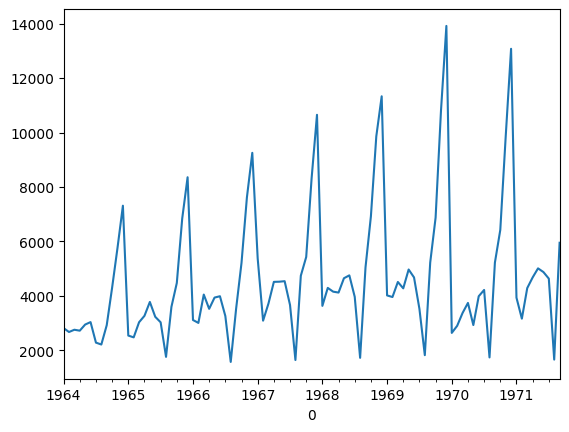

In [ ]:
from pandas import read_csv
from matplotlib import pyplot as plt
# For Jupyter notebooks
%matplotlib inline

# Read the CSV file
series = read_csv(data_dir + 'dataset.csv', header=None, index_col=0, parse_dates=True)

# Squeeze the result if it's a single-column DataFrame
series = series.squeeze()

# Plot the series
series.plot()

# Show the plot
plt.show()


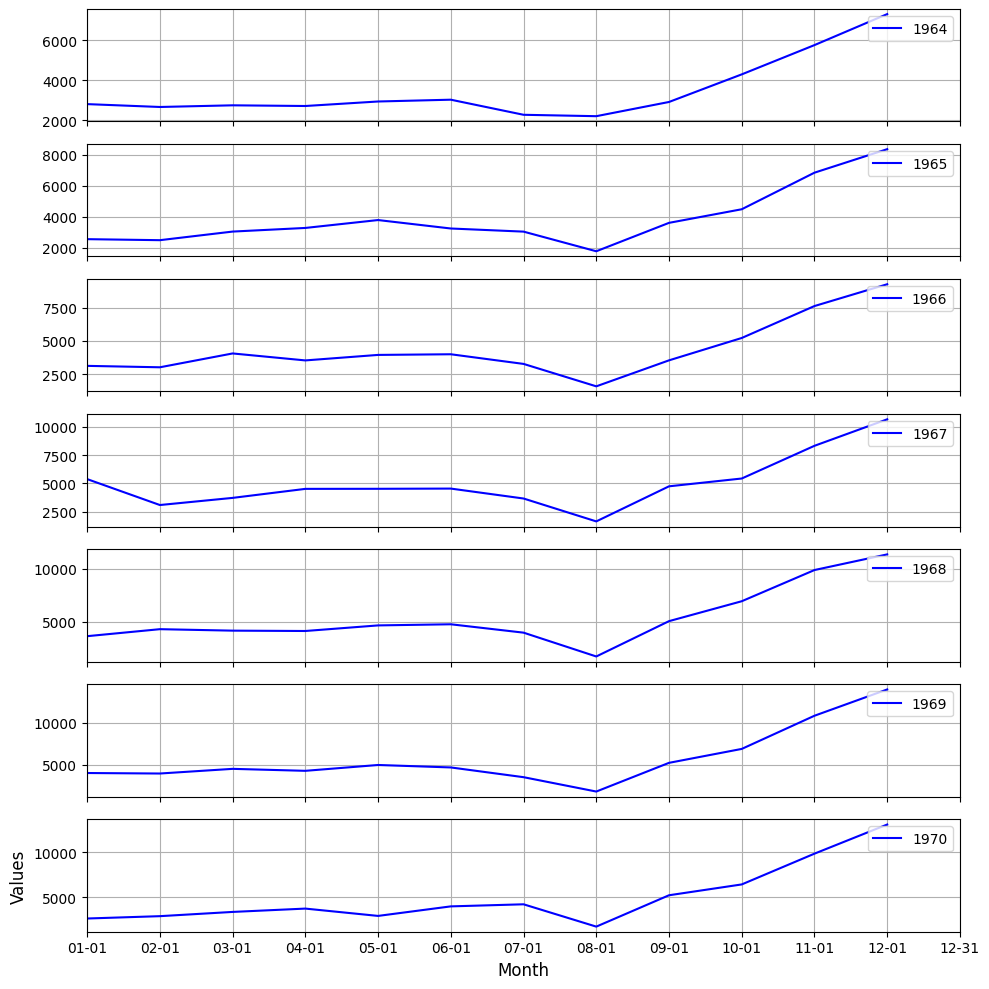

In [ ]:
from pandas import read_csv, DataFrame, Grouper
from matplotlib import pyplot as plt

# Load the dataset and squeeze the single column to a series
series = read_csv(data_dir + 'dataset.csv', header=None, index_col=0, parse_dates=True).squeeze()

# Group the series data by year ('A' stands for annual frequency)
groups = series['1964':'1970'].groupby(Grouper(freq='A'))

# Initialize the plotting area, making sure to accommodate each group
fig, axs = plt.subplots(len(groups), 1, figsize=(10, 10), sharex=True)

# Loop over each group to plot separately
for i, (name, group) in enumerate(groups):
    # Extract the year to align each subplot from Jan to Dec
    group.index = group.index.strftime('%m-%d')  # Format index to show only the month and day

    axs[i].plot(group.index, group.values, label=f'{name.year}', color='b')
    axs[i].set_xlim(['01-01', '12-31'])  # Set x-axis from January to December
    axs[i].legend(loc='upper right')  # Use the legend to show the year
    axs[i].grid(True)  # Add grid for better visual clarity

# Set a common x label and y label
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Adjust layout to prevent overlap and ensure legends and axis labels are clean
plt.tight_layout()

# Show the plot
plt.show()


Running the example creates the stack of 7 line plots. We can clearly see a dip each August and a rise from each August to December. This pattern appears the same each year, although at different levels.

This will help with any explicitly season-based modeling later.

### 2.6 Density Plot

Reviewing plots of the density of observations can provide further insight into the structure of the data. The example below creates a histogram and density plot of the observations without any temporal structure.

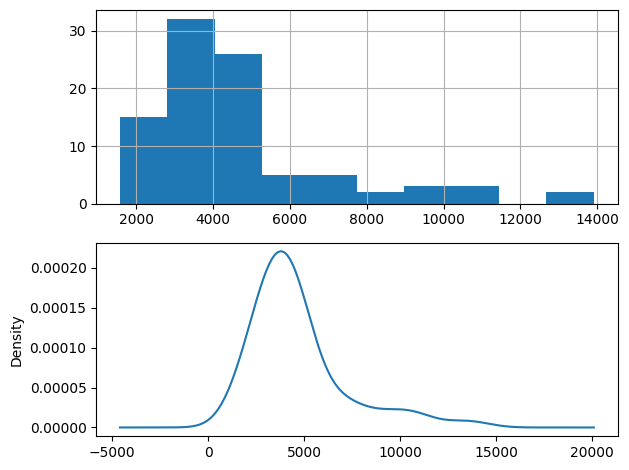

In [ ]:
from pandas import read_csv
from matplotlib import pyplot as plt

# Load the data without the deprecated 'squeeze' argument and use .squeeze() afterward
series = read_csv(data_dir + 'dataset.csv', header=None, index_col=0, parse_dates=True).squeeze()

# Create the figure for subplots
plt.figure(1)

# Create the histogram in the first subplot
plt.subplot(211)
series.hist()

# Create the kernel density estimate (KDE) plot in the second subplot
plt.subplot(212)
series.plot(kind='kde')

# Show the plot
plt.tight_layout()  # Ensures that the subplots don't overlap
plt.show()


Some observations from the plots include:

--- The distribution is not Gaussian.

--- The shape has a long right tail and may suggest an exponential distribution.This lends more support to exploring some power transforms of the data prior to modeling.

### 2.7 Box and Whisker Plots

We can group the monthly data by year and get an idea of the spread of observations for each year and how this may be changing.  

We do expect to see some trend (increasing mean or median), but it may be interesting to see how the rest of the distribution may be changing.  

The example below groups the observations by year and creates one box and whisker plot for each year of observations. The last year (1971) only contains 9 months and may not be a useful comparison with the 12 months of observations for other years. Therefore, only data between 1964 and 1970 was plotted.  

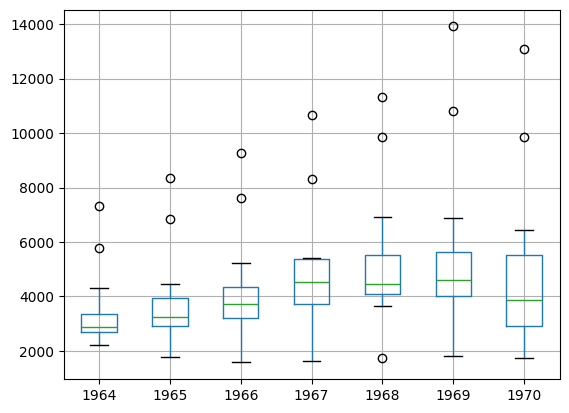

In [ ]:
from pandas import read_csv, DataFrame, Grouper
from matplotlib import pyplot as plt

# Load the dataset, use .squeeze() after loading to convert to Series
series = read_csv(data_dir + 'dataset.csv', header=None, index_col=0, parse_dates=True).squeeze()

# Group the series data by year ('A' stands for annual frequency)
groups = series['1964':'1970'].groupby(Grouper(freq='A'))

# Create an empty DataFrame to store yearly data
years = DataFrame()

# Loop through each group and store the values in the 'years' DataFrame
for name, group in groups:
    years[name.year] = group.values

# Plot a boxplot for each year
years.boxplot()

# Show the plot
plt.show()


Running the example creates 7 box and whisker plots side-by-side, one for each of the 7 years of selected data.

Some observations from reviewing the plots include:  

The median values for each year (green line) may show an increasing trend.  
The spread or middle 50% of the data (blue boxes) does appear reasonably stable.  
There are outliers each year (black crosses); these may be the tops or bottoms of the seasonal cycle.  
The last year, 1970, does look different from the trend in prior years  

The observations suggest perhaps some growth trend over the years and outliers that may be a part of the seasonal cycle.  

This yearly view of the data is an interesting avenue and could be pursued further by looking at summary statistics from year-to-year and changes in summary stats from year-to-year.  

# 3. ARIMA Models

This section will implement the ARIMA models for the  (Time Series of Champagne.csv). We will look at the impact of the different hyper-tuning parameters and their corresponding significance on the nature of the time series. We will also discuss how the prediction's accuracy can be further improved based on the statistical distribution of the residual errors of the model selected.

### 3.1 Let's manually configure ARIMA!

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.  Analysis of the time series data assumes that we are working with a stationary time series.  Time series is almost certainly non-stationary. We can make it stationary this by first differencing the series and using a statistical test to confirm that the result is stationary.  

The seasonality in the series is seemingly year-to-year. Seasonal data can be differenced by subtracting the observation from the same time in the previous cycle, in this case the same month in the previous year. This does mean that we will lose the first year of observations as there is no prior year to difference with.  

The example below creates a deseasonalized version of the series and saves it to file stationary.csv.  

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


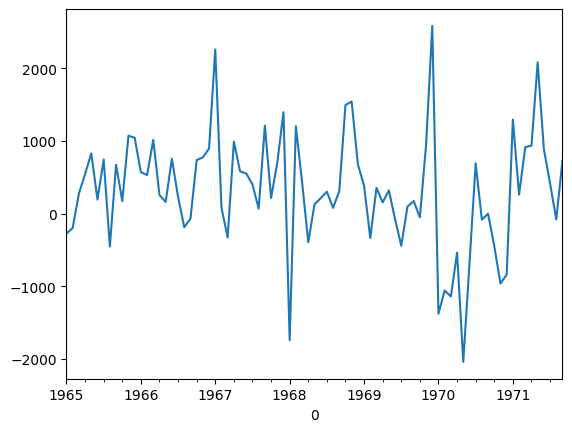

In [ ]:
from pandas import read_csv, Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

# Create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# Load the dataset
series = read_csv(data_dir + 'dataset.csv', header=None, index_col=0, parse_dates=True).squeeze()

# Convert the series values to float32
X = series.values
X = X.astype('float32')

# Difference data
months_in_year = 12
stationary = difference(X, months_in_year)

# Set the index of the stationary series to align with the original series
stationary.index = series.index[months_in_year:]

# Perform the ADF test to check stationarity
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Save the differenced data to a CSV file
stationary.to_csv('stationary.csv', header=False)

# Plot the differenced data
stationary.plot()
plt.show()


### Stationarity is critical and we need to run statistics

Running the example outputs the result of a statistical significance test of whether the differenced series is stationary. Specifically, the augmented Dickey-Fuller test. Null hypothesis is the system has unit root which implies, it is non-stationary. Rejection of null hypothesis means that the process has no unit root, and in turn that the time series is stationary.  

The results show that the test statistic value -7.134898 is smaller than the critical value at 1% of -3.515. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).  Rejecting the null hypothesis means that the process has no unit root, and in turn that **the time series is stationary or does not have time-dependent structure**.

Notice that if we did not do a 12 month differencing and simply use the series the results would be non-stationary.

In [ ]:
# check if stationary
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#p < \alpha reject the null hypothesis (system has no unit root = stationary)
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save


ADF Statistic: -1.445970
p-value: 0.560050
Critical Values:
	1%: -3.514
	5%: -2.898
	10%: -2.586


For reference, the seasonal difference operation can be inverted by adding the observation for the same month the year before. This is needed in the case that predictions are made by a model fit on seasonally differenced data. The function to invert the seasonal difference operation is listed below for completeness.



In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

A plot of the differenced dataset is also created. The plot does not show any obvious seasonality or trend, suggesting the seasonally differenced dataset is a good starting point for modeling. We will use this dataset as an input to the ARIMA model. It also suggests that no further differencing may be required, and that **the d parameter may be set to 0.**

The next first step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

Note, we are now using the seasonally differenced stationary.csv as our dataset. The example below creates ACF and PACF plots for the series.

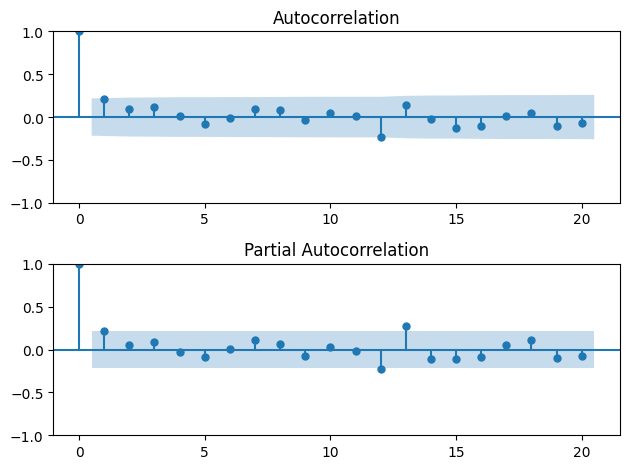

In [ ]:
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

# Load the dataset
series = read_csv('stationary.csv', header=None, index_col=0, parse_dates=True).squeeze()

# Create a figure for subplots
plt.figure()

# Plot ACF (Autocorrelation Function) in the first subplot
plt.subplot(211)
plot_acf(series, ax=plt.gca())

# Plot PACF (Partial Autocorrelation Function) in the second subplot
plt.subplot(212)
plot_pacf(series, ax=plt.gca())

# Show the plots
plt.tight_layout()  # Ensure no overlapping between plots
plt.show()


Run the example and review the plots for insights into how to set the p and q variables for the ARIMA model.

Below are some observations from the plots.

The ACF shows a significant lag for 1 month.
The PACF shows a significant lag for 1 month, with perhaps some significant lag at 12 and 13 months.
Both the ACF and PACF show a drop-off at the same point, perhaps suggesting a mix of AR and MA.
A good starting point for the p and q values is also 1.

The PACF plot also suggests that there is still some seasonality present in the differenced data.

We may consider a better model of seasonality, such as modeling it directly and explicitly removing it from the model rather than seasonal differencing.

This quick analysis suggests an ARIMA(1,0,1) on the stationary data may be a good starting point.

The historic observations will be seasonally differenced prior to the fitting of each ARIMA model. The differencing will be inverted for all predictions made to make them directly comparable to the expected observation in the original sale count units.

Experimentation shows that this configuration of ARIMA does not converge and results in errors by the underlying library. Further experimentation showed that adding one level of differencing to the stationary data made the model more stable. The model can be extended to ARIMA(1,1,1).

We will also disable the automatic addition of a trend constant from the model by setting the ‘trend‘ argument to ‘nc‘ for no constant in the call to fit(). From experimentation, I find that this can result in better forecast performance on some problems.

The example below demonstrates the performance of this ARIMA model (1,0,1).

In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

#def difference(dataset, interval=1):
#    diff = np.diff(dataset, n=interval)
#    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = dataset
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
	# difference data
  months_in_year = 12
  diff = difference(history, months_in_year)
  #predict
  model = ARIMA(diff, order=(1, 0, 1))
  model_fit = model.fit()
  #Forecast one step ahead (you can adjust the steps as needed)
  forecast = model_fit.get_forecast(steps=1)
  #Get the forecasted value
  yhat = forecast.predicted_mean[0]
  #Reverse the differencing if necessary (assuming you have the inverse_difference function)
  yhat = inverse_difference(history, yhat, months_in_year)
  #Append the forecasted value to the predictions list
  predictions.append(yhat)
  #observation
  obs = test[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)

>Predicted=5192.293, Expected=3370
>Predicted=4388.346, Expected=3740
>Predicted=5547.622, Expected=2927
>Predicted=4568.572, Expected=3986
>Predicted=3413.729, Expected=4217
>Predicted=2107.539, Expected=1738
>Predicted=5442.137, Expected=5221
>Predicted=7090.625, Expected=6424
>Predicted=10935.982, Expected=9842
>Predicted=13819.453, Expected=13076
>Predicted=2414.543, Expected=3934
>Predicted=2945.925, Expected=3162
>Predicted=3496.779, Expected=4286
>Predicted=4127.483, Expected=4676
>Predicted=3364.242, Expected=5010
>Predicted=4694.284, Expected=4874
>Predicted=4794.672, Expected=4633
>Predicted=2163.621, Expected=1659
>Predicted=5483.732, Expected=5951
RMSE: 1038.518
MAE: 821.271


Note, you may see a warning message from the underlying linear algebra library; this can be ignored for now.

Running this example results in an RMSE and MAE of 1038.52 and 821.27, respectively, which is dramatically better than the 1 step walkin RMSE and MAE of 3167.362 and 2100.830, respectively.

This is a great start, but we may be able to get improved results with a better configured ARIMA model.

### 3.2 Automatically configure ARIMA: Grid Search ARIMA Hyperparameters

The ACF and PACF plots suggest that an ARIMA(1,0,1) or similar may be the best that we can do.

To confirm this analysis, we can grid search a suite of ARIMA hyperparameters and check that no models result in better out of sample RMSE performance.

In this section, we will search values of p, d, and q for combinations (skipping those that fail to converge), and find the combination that results in the best performance on the test set. We will use a grid search to explore all combinations in a subset of integer values.

Specifically, we will search all combinations of the following parameters:

p: 0 to 6.
d: 0 to 2.
q: 0 to 6.
This is (7 * 3 * 7), or 147, potential runs of the test harness and will take some time to execute.

It may be interesting to evaluate MA models with a lag of 12 or 13 as were noticed as potentially interesting from reviewing the ACF and PACF plots. Experimentation suggested that these models may not be stable, resulting in errors in the underlying mathematical libraries.

The complete worked example with the grid search version of the test harness is listed below.

In [ ]:
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA

# Create a differenced series
def difference(dataset, interval=1):
    diff = np.diff(dataset, n=interval)
    return diff

# Invert differenced value
#def inverse_difference(history, yhat, interval=1):
#    return yhat + history[-interval]

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # Prepare training dataset
    #X = X.astype('float32')
    train_size = int(len(X) * 0.80)  # Use 80% of data for training
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    #history = list(train)
    months_in_year = 12  # Define the number of months in a year

    # Make predictions
    predictions = list()
    for t in range(len(test)):
        # Difference data
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit()
        forecast = model_fit.get_forecast(steps=1)
        yhat = forecast.predicted_mean[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)

    # Calculate out-of-sample error (RMSE)
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    #print(test)
    #print(predictions)
    return rmse


In [ ]:
# Evaluate combinations of p, d, and q values for an ARIMA model

# load data
series = dataset
X = series.values


evaluate_arima_model(X, (0, 0, 1))


971.7597581952969

In [ ]:
from itertools import product
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Filter out ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Define ranges for p, d, q
p_range = range(0, 4)
d_range = range(0, 2)
q_range = range(0, 4)

# Initialize a dictionary to store the results
results = {}

# Iterate over all combinations of p, d, q
for p, d, q in product(p_range, d_range, q_range):
    order = (p, d, q)
    # Evaluate the ARIMA model for the current (p, d, q) order
    rmse = evaluate_arima_model(X, order)
    # Store the result in the dictionary
    results[order] = rmse
    print(f"Order {order}, RMSE: {rmse}")

# Find the (p, d, q) combination with the lowest RMSE
best_order = min(results, key=results.get)
best_rmse = results[best_order]

# Print the best (p, d, q) combination and the corresponding RMSE
print(f"\nBest Order: {best_order}, Lowest RMSE: {best_rmse}")



Order (0, 0, 0), RMSE: 1013.4644270587296
Order (0, 0, 1), RMSE: 971.7597581952969
Order (0, 0, 2), RMSE: 1043.453623451426
Order (0, 0, 3), RMSE: 1060.4957047094797
Order (0, 1, 0), RMSE: 956.4557381015435
Order (0, 1, 1), RMSE: 1031.0969618661493
Order (0, 1, 2), RMSE: 988.3535487121972
Order (0, 1, 3), RMSE: 1049.8508866136244
Order (1, 0, 0), RMSE: 967.104014515511
Order (1, 0, 1), RMSE: 1038.5183182524443
Order (1, 0, 2), RMSE: 1072.1701782043206
Order (1, 0, 3), RMSE: 1084.2890900007426
Order (1, 1, 0), RMSE: 910.7211045316684
Order (1, 1, 1), RMSE: 996.9214431962871
Order (1, 1, 2), RMSE: 1034.0836162290034
Order (1, 1, 3), RMSE: 1037.1441315442853
Order (2, 0, 0), RMSE: 1029.164077324561
Order (2, 0, 1), RMSE: 1093.2665994920378
Order (2, 0, 2), RMSE: 1089.0289380299118
Order (2, 0, 3), RMSE: 1079.6130113927513
Order (2, 1, 0), RMSE: 1009.7903676381766
Order (2, 1, 1), RMSE: 1036.54149521367
Order (2, 1, 2), RMSE: 1052.7722298186563
Order (2, 1, 3), RMSE: 1130.1462057111878
Ord

Running the example runs through all combinations and reports the results on those that converge without error. The results show that the best configuration discovered was ARIMA(1, 1, 0) with an RMSE of 910.72, lower than the manually configured ARIMA from the previous section.

### 3.3 Review Residual Errors

A good final check of a model is to review residual forecast errors.

Ideally, the distribution of residual errors should be a Gaussian with a zero mean.

We can check this by using summary statistics and plots to investigate the residual errors from the ARIMA(0, 0, 1) model. The example below calculates and summarizes the residual forecast errors.


                 0
count    19.000000
mean    124.187913
std     926.936878
min   -1235.893095
25%    -553.150800
50%     -98.974749
75%     584.514995
max    2186.800945


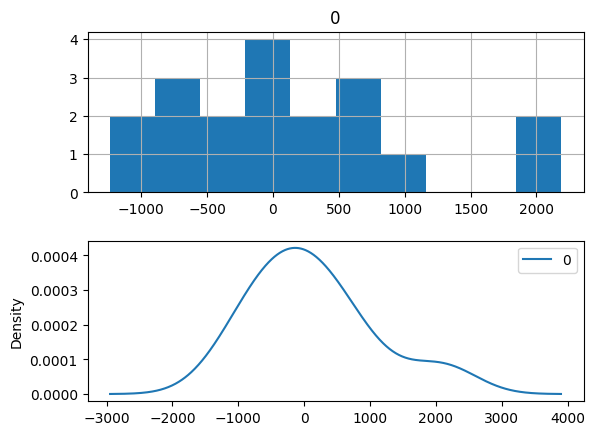

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = dataset
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,0))
	model_fit = model.fit()
	forecast = model_fit.get_forecast(steps=1)
	#Get the forecasted value
	yhat = forecast.predicted_mean[0]
	#Reverse the differencing if necessary (assuming you have the inverse_difference function)
	yhat = inverse_difference(history, yhat, months_in_year)
  #Append the forecasted value to the predictions list
	predictions.append(yhat)

	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

Running the example first describes the distribution of the residuals. We can see that the distribution has a right shift and that the **mean is non-zero at 124.187913.**

This is perhaps a sign that the predictions are biased. The distribution of residual errors is also plotted. The graphs suggest a Gaussian-like distribution with a bumpy left tail, providing further evidence that perhaps a power transform might be worth exploring.

We could use this information to bias-correct predictions by adding the mean residual error of 124.187913to each forecast made.

The example below performs this bias correlation.

RMSE: 902.214
                  0
count  1.900000e+01
mean  -7.083751e-08
std    9.269369e+02
min   -1.360081e+03
25%   -6.773387e+02
50%   -2.231627e+02
75%    4.603271e+02
max    2.062613e+03


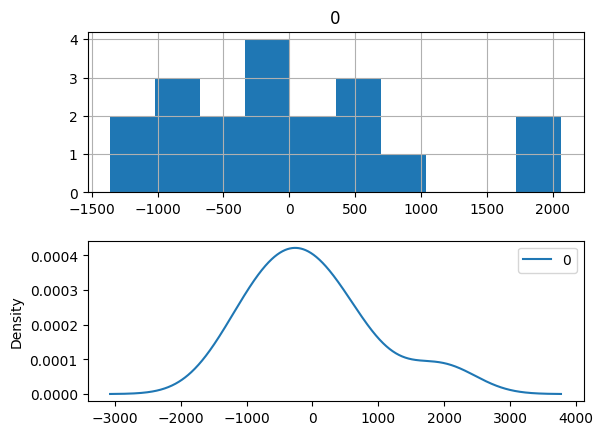

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = dataset
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 124.187913

for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,0))
	model_fit = model.fit()
	forecast = model_fit.get_forecast(steps=1)
	#Get the forecasted value
	yhat = forecast.predicted_mean[0]
	#Reverse the differencing if necessary (assuming you have the inverse_difference function)
	yhat = bias+inverse_difference(history, yhat, months_in_year)
  #Append the forecasted value to the predictions list
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

It is also a good idea to check the time series of the residual errors for any type of autocorrelation. If present, it would suggest that the model has more opportunity to model the temporal structure in the data.

The example below re-calculates the residual errors and creates ACF and PACF plots to check for any significant autocorrelation.

The results suggest that what little autocorrelation is present in the time series has been captured by the model.

In [ ]:
import pickle
from statsmodels.tsa.arima.model import ARIMA
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# load data
series = dataset
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)


# Define a custom method to handle the serialization issue
def custom_arima_getnewargs(self):
    # Replace 'self.endog' with the appropriate attribute if needed
    # You might need to adjust this depending on your ARIMA model's configuration
    return (self.endog, self.order)

# Monkey patch the ARIMA class
ARIMA.__getnewargs__ = custom_arima_getnewargs

# Example: ARIMA model training
# Replace with your actual time series data and ARIMA configuration
model = ARIMA(X, order=(1, 1, 0))
model_fit = model.fit()

# Save
with open(data_dir +'arima_model.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)

### 3.4 Make Prediction and Validate the model

A natural case may be to load the model and make a single forecast.

This is relatively straightforward and involves restoring the saved model and the bias and calling the forecast() method. To invert the seasonal differencing, the historical data must also be loaded.

The example below loads the model, makes a prediction for the next time step, and prints the prediction.

We can load the model and use it in a pretend operational manner.

In the test harness section, we saved the final 12 months of the original dataset in a separate file to validate the final model.

We can load this validation.csv file now and use it see how well our model really is on “unseen” data.

There are two ways we might proceed:

Load the model and use it to forecast the next 12 months. The forecast beyond the first one or two months will quickly start to degrade in skill.
Load the model and use it in a rolling-forecast manner, updating the transform and model for each time step. This is the preferred method as it is how one would use this model in practice as it would achieve the best performance.
As with model evaluation in previous sections, we will make predictions in a rolling-forecast manner. This means that we will step over lead times in the validation dataset and take the observations as an update to the history.

>Predicted=12121.505, Expected=6981.000
>Predicted=10596.061, Expected=9851.000
>Predicted=13439.300, Expected=12670.000
>Predicted=3824.648, Expected=4348.000
>Predicted=3356.708, Expected=3564.000
>Predicted=4817.175, Expected=4577.000
>Predicted=5137.317, Expected=4788.000
>Predicted=5320.524, Expected=4618.000
>Predicted=4814.860, Expected=5312.000
>Predicted=4848.377, Expected=4298.000
>Predicted=1774.485, Expected=1413.000
>Predicted=5791.814, Expected=5877.000
RMSE: 1561.245


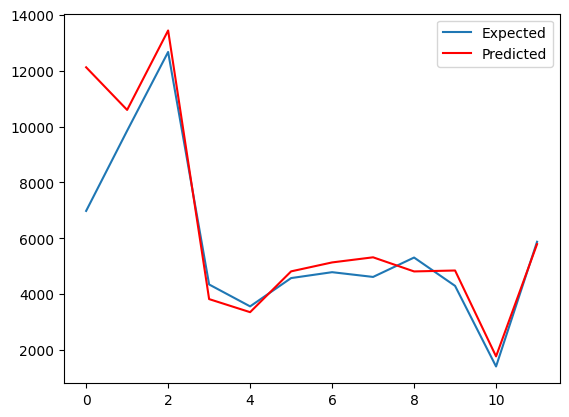

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pickle  # Import pickle for loading the ARIMA model

# Create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# Invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# Load and prepare datasets
series = read_csv(data_dir + 'dataset.csv', header=None, index_col=0, parse_dates=True).squeeze()
X = series.values.astype('float32')
history = [x for x in X]
months_in_year = 12

# Load validation data
validation = read_csv(data_dir + 'validation.csv', header=None, index_col=0, parse_dates=True).squeeze()
y = validation.values.astype('float32')

# Load the pre-trained ARIMA model using pickle
with open(data_dir + 'arima_model.pkl', 'rb') as pkl:
    model_fit = pickle.load(pkl)

# Set bias value (from earlier training)
bias = 124.187913

# Make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))

# Rolling forecasts
for i in range(1, len(y)):
    # Difference the data
    diff = difference(history, months_in_year)
    # Fit the ARIMA model
    model = ARIMA(diff, order=(1,1,0))
    model_fit = model.fit()
    # Forecast
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# Report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

# Plot expected vs predicted values
pyplot.plot(y, label='Expected')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()


#**Practice Activity.** (Discussion-based, non-submission, but may appear in future assessments like the QUIZ or Final Exam):
Implement ARIMA using the non-stationary statistics and compare it with the above results.

#**Class Activity 1.** (Discussion-based, per LT, non-submission, but may appear in future assessments like the QUIZ or Final Exam):

With your learning teams, discuss the following:  The forward forecast model demonstrated here relies solely on univariate time series data (i.e., using only time series windows). Discuss the strengths and weaknesses of this approach compared to more complex models like Gradient Boosting Machines (GBM) that can incorporate multiple regressors/inputs. How do these methods differ in terms of accuracy, complexity, and real-world applicability?